In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Importing and understanding our dataset

In [2]:
#connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the dataset from drive

data = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/Country-data.csv')

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


* Income, GDPP and Child mortality have higher mean than the 50 percentile indicating a heavily right skewed histogram.

* Also, Inflation ranges from negative values to high positive values. This suggests there might be distant outliers.

In [8]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Data does not have any null values and all the columns have continuous numerical values.

#**Exploratory Data Analysis**

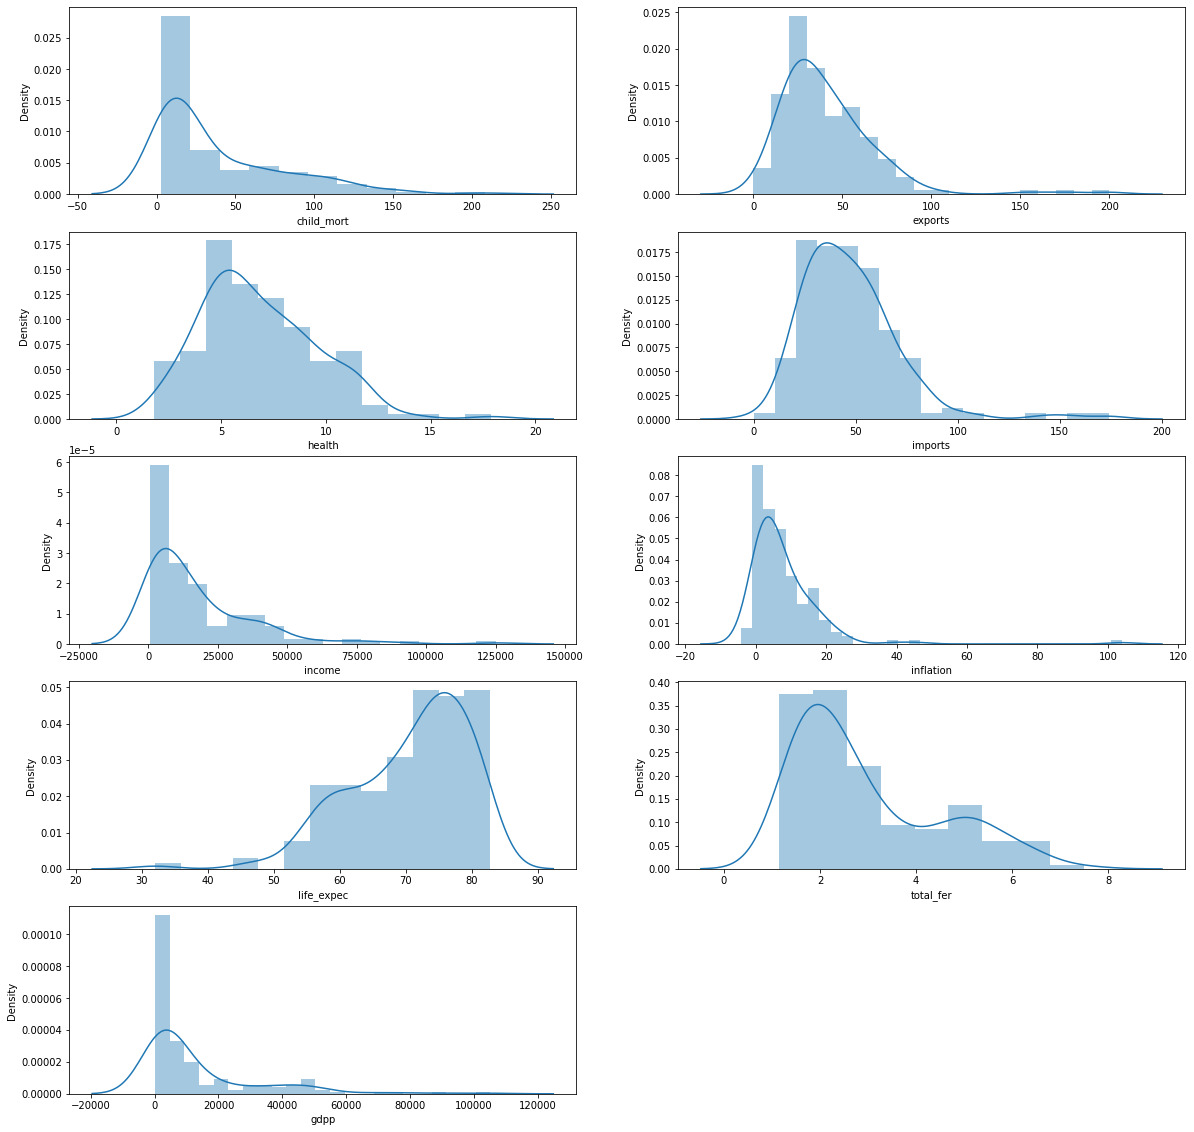

In [9]:
num_cols= [col for col in data.columns]
num_cols.remove('country')

plt.figure(figsize=(20,20))
i=1
for col in num_cols:
    plt.subplot(5,2,i)
    sns.distplot(data[col])
    i+=1

In [10]:
datax = data.drop(columns="country")
datax.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


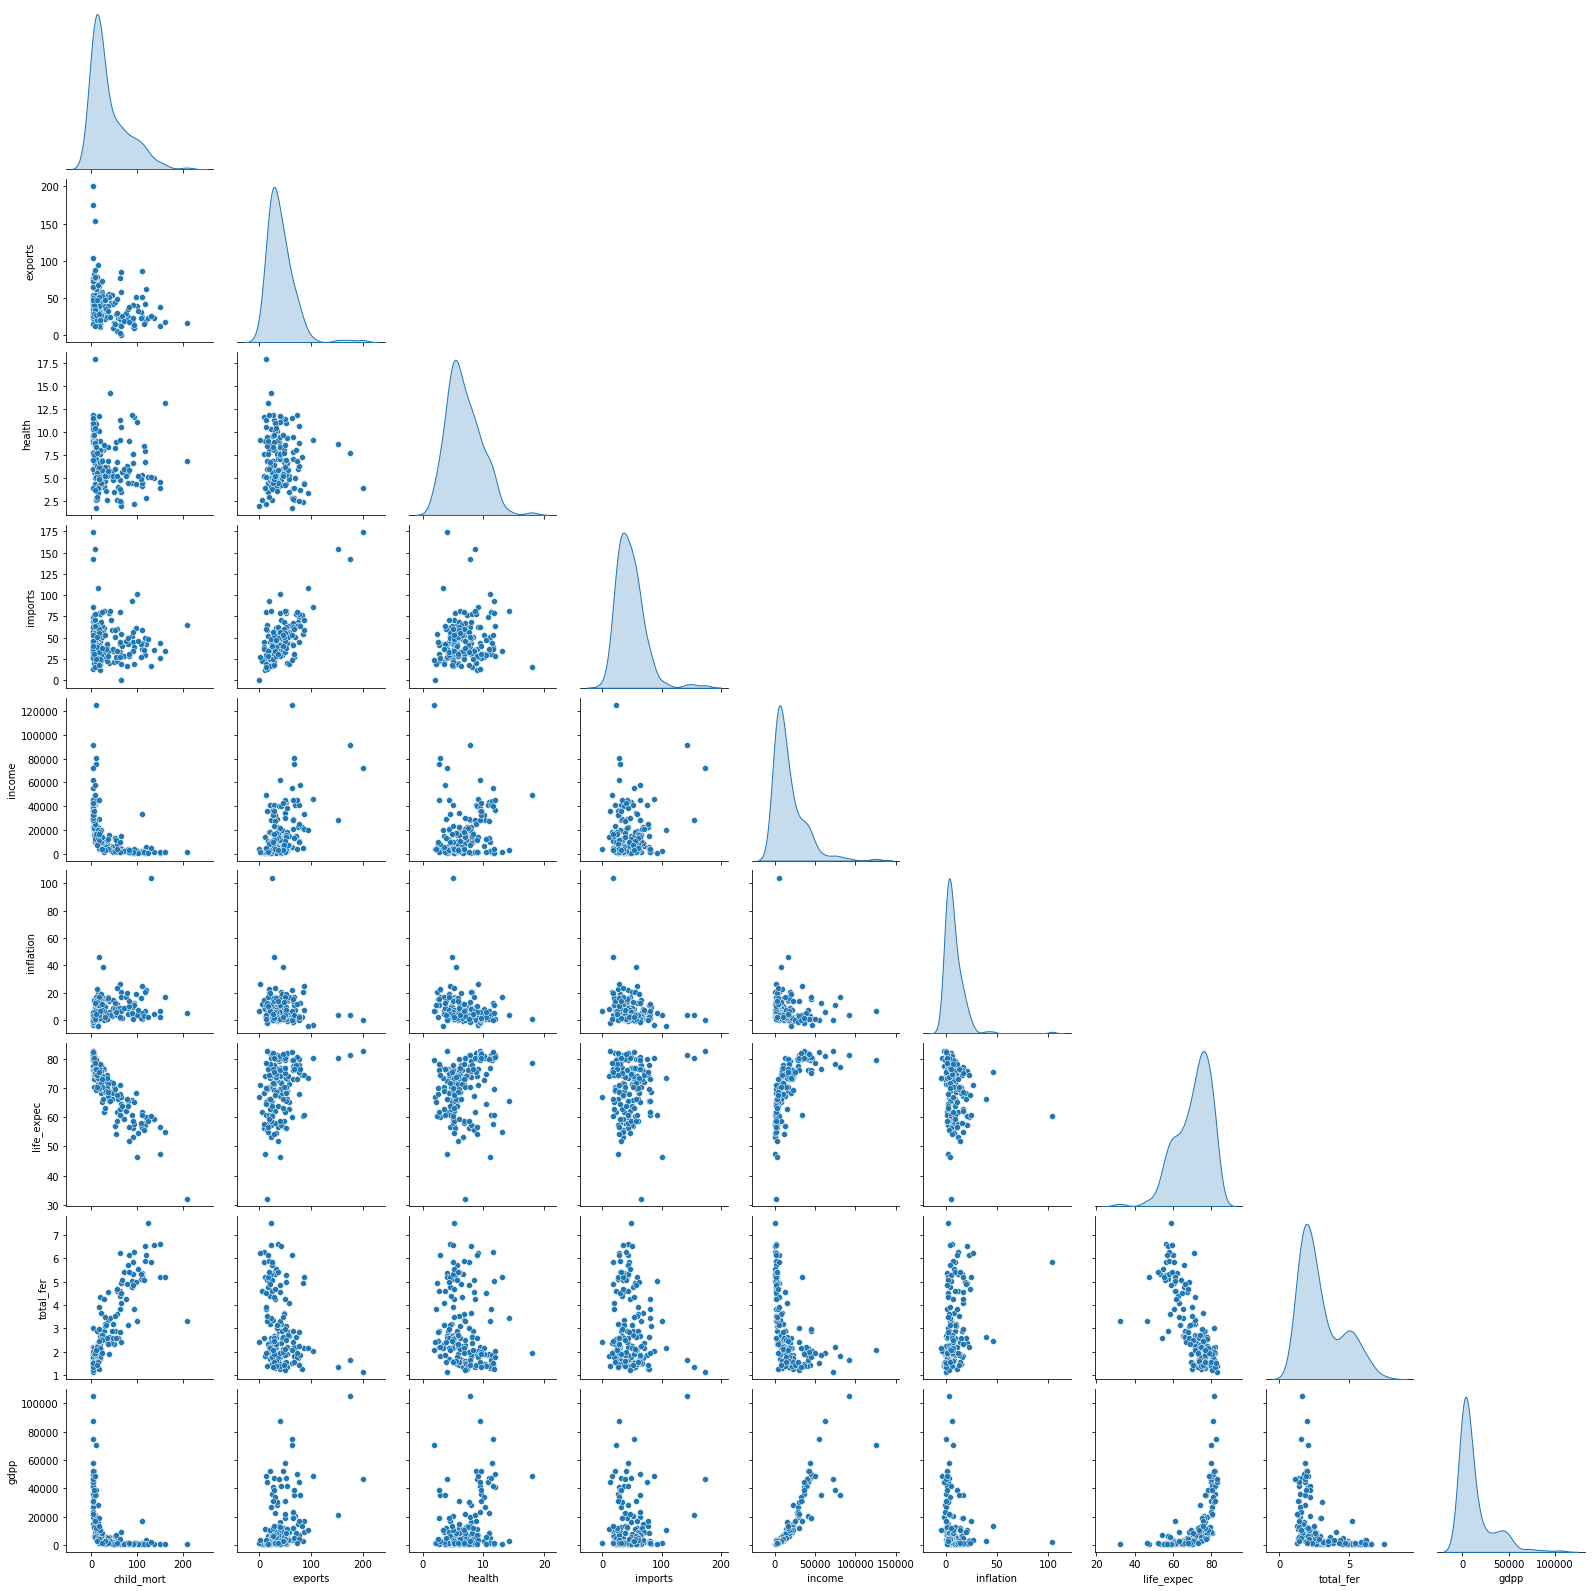

In [11]:
sns.pairplot(datax, diag_kind = 'kde', corner = True)

###Histograms:

* Most of the data is right skewed except for life expectancy which is right skewed.

* There are two peaks in GDPP and total fertility suggesting at least 2 clusters can be formed in the data.

* All of the plots suggest there are outliers.

###Scatter Plot:

* Income and GDPP seems to have high correlation.

* All Countries with higher GDPP have low child mortality and high life expectancy and lower inflation.

* Also, all countries with higher income have lower child mortality

* There is a slight positive correlation between imports and exports.

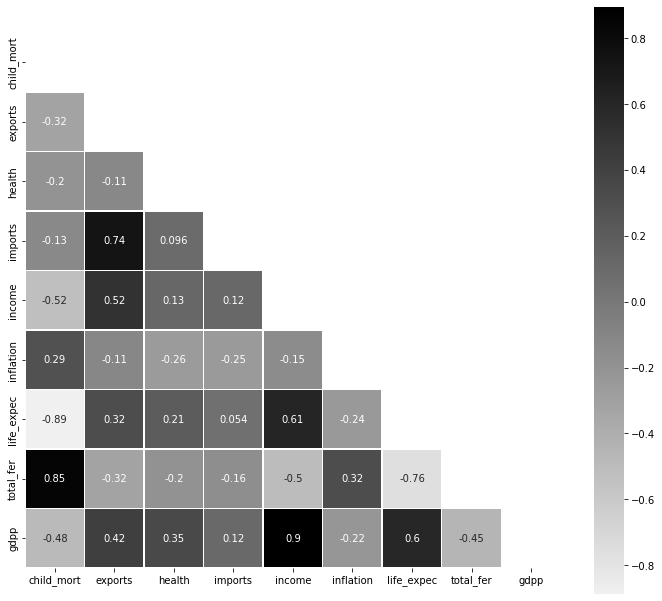

In [12]:
#More prominent correlation plot
import numpy as np
import seaborn as sns
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.light_palette('black', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

###Insights from Pearson's Correlation Coefficient Plot :

* Imports have high positive correlation with Exports (+0.74)
* Income has fairly high positive correlation with Exports (+0.52)
* Life Expectancy has fairly high positive correlation with Income (+0.61)
* Total Fertility has very high positive correlation with Child Mortality (+0.85)
* GDPP has very high positive correlation with Income (+0.90)
* GDPP has fairly high positive correlation with Life Expectancy (+0.60)
* Total Fertility has fairly high negative correlation with Life Expectancy (-0.76) 

## 1. Principal Component Analysis
Principal Component Analysis (PCA) is a popular technique for deriving a set of low dimensional features from a large set of variables. Sometimes reduced dimensional set of features can represent distinct no. of groups with similar characteristics. Hence PCA can be an insightful clustering tool (or a preprocessing tool before applying clustering as well). We will standardize our data first and will use the scaled data for all clustering works in future.

In [13]:
data = data.drop('country', axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

Here, I have used singular value decomposition solver "auto" to get the no. of principal components.


In [15]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(data_scaled)
print('Total no. of principal components =',pc.n_components_)

Total no. of principal components = 9


In [16]:
#Print Principal Components
print('Principal Component Matrix :\n',pc.components_)

Principal Component Matrix :
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02

Let us check the amount of variance explained by each principal component here. They will be arranged in decreasing order of their explained variance ratio.

In [17]:
#The amount of variance that each PC explains
var = pc.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, 'Explained Variance Ratio')

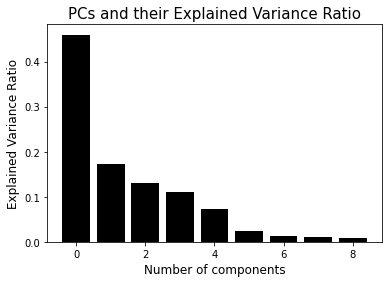

In [18]:
#Plot explained variance ratio for each PC
plt.bar([i for i, _ in enumerate(var)],var,color='black')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

We can see, the variance explained by first and second principal components are nearly 46% and 17% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [19]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


Using these cumulative variance ratios for all PCs, we will now draw a scree plot. It is used to determine the number of principal components to keep in this principal component analysis.

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

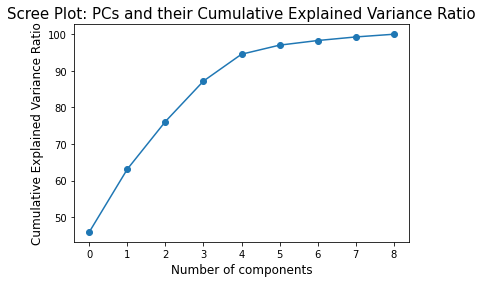

In [20]:
# Scree Plot
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

The plot indicates the threshold of 90% is getting crossed at PC = 4. Ideally, we can keep 4 (or atmost 5) components here. Before PC = 5, the plot is following an upward trend. After crossing 5, it is almost steady. However, we have retailed all 9 PCs here to get the full data in results. And for visualization purpose in 2-D figure, we have plotted only PC1 vs PC2.

# **2. K-Means Clustering**

This is the most popular method of clustering. It uses Euclidean distance between clusters in each iteration to decide a data point should belong to which cluster, and proceed accordingly. To decide how many no. of clusters to consider, we can employ several methods. The basic and most widely used method is Elbow Curve.

**Plotting Elbow Curve**

In [21]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

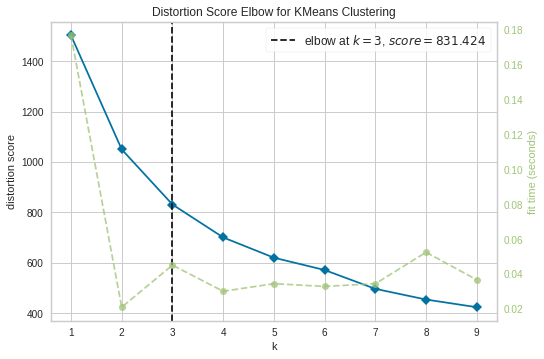

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scaled)    
visualizer.poof()

* Here, along Y-axis, "distortion" is defined as "the sum of the squared differences between the observations and the corresponding centroid". It is same as WCSS (Within-Cluster-Sum-of-Squares).

* Let's see the centroids of the clusters. Afterwards, we will fit our scaled data into a K-Means model having 3 clusters, and then label each data point (each record) to one of these 3 clusters.

In [23]:
#Fitting data into K-Means model with 3 clusters
km_3=KMeans(n_clusters=3,random_state=12345)
km_3.fit(data_scaled)
print(km_3.cluster_centers_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]


In [24]:
print(km_3.labels_)

[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


We can see each record has got a label among 0,1,2. This label is each of their cluster_id i.e. in which cluster they belong to. We can count the records in each cluster now.

In [25]:
  pd.Series(km_3.labels_).value_counts()

0    84
1    47
2    36
dtype: int64

We see, the highest no. of records belong to the first cluster.

Now, we are interested to check how good is our K-Means clustering model. Silhouette Coefficient is one such metric to check that. The Silhouette Coefficient is calculated using:

the mean intra-cluster distance ( a ) for each sample
the mean nearest-cluster distance ( b ) for each sample
The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [26]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled, km_3.labels_)

0.28329575683463126

In [27]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=12345)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

We can check Silhouette Scores for K-Means model with different no. of clusters

In [28]:
print(scores)

[0.28735668921406704, 0.28329575683463126, 0.301375962376881, 0.3065522876043576, 0.23300198114343365, 0.24738238438751395, 0.25598761482022847, 0.22932623686380524]


* We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

* For further analysis, we will consider Davies-Bouldin Score apart from Silhouette Score. Davies-Bouldin Score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

* We will also analyze SSE (Sum of Squared Errors). SSE is the sum of the squared differences between each observation and its cluster's mean. It can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0. The formula for SSE is: 1

 Plotting of SSE, Davies-Bouldin Scores, Silhouette Scores to Decide Ideal No. of Clusters

In [29]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

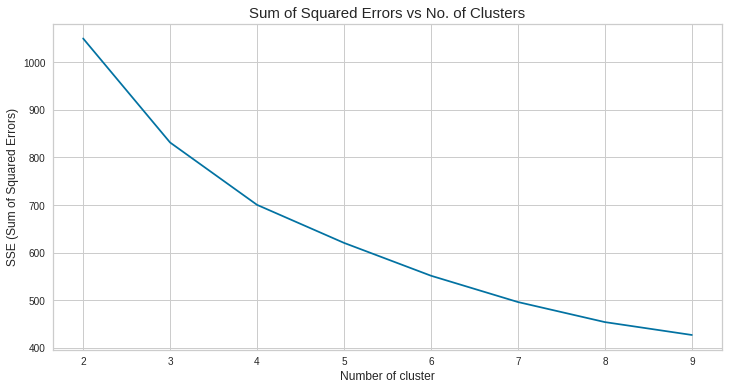

In [30]:
#Plotting SSE
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

We can see "knee" like bent at both 3 and 4, still considering no. of clusters = 4 seems a better choice, because after 4, there is no further "knee" like bent observed. Still, we will analyse further to decide between 3 and 4.

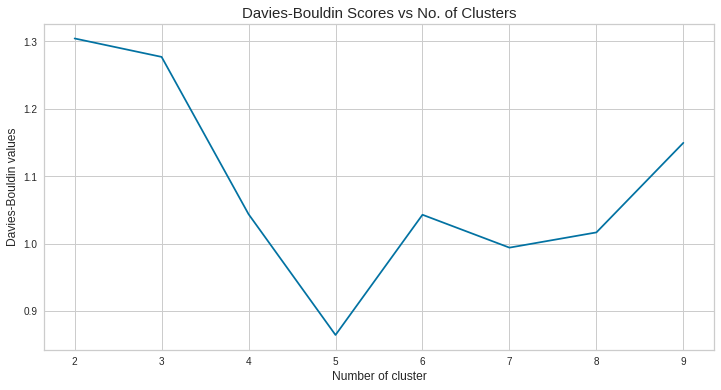

In [31]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

Clearly, no. of clusters = 3 is the best choice here.

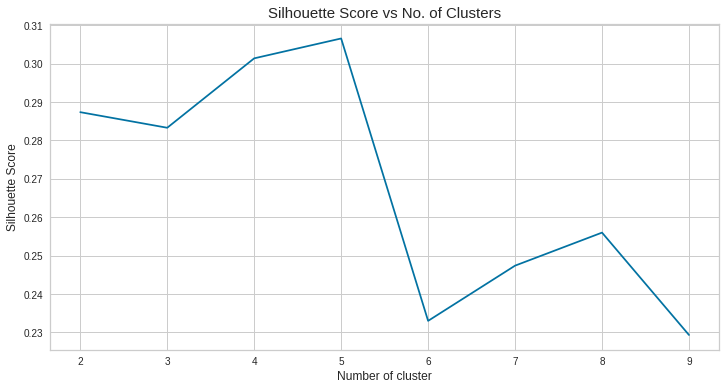

In [32]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()


In [33]:
cluster_labels = km_3.fit_predict(data_scaled)

No. of clusters = 3 seems the best choice here as well. The silhouette score ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score nearly 0.28 seems a good one

Now, we will see data with labels (cluster_ids labelled).

In [34]:
preds = km_3.labels_
data_df = pd.DataFrame(data)
data_df['KM_Clusters'] = preds
data_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [35]:
data = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/Country-data.csv')

In [36]:
data_df['Country'] = data['country']

In [37]:
cluster_0= data_df.loc[data_df['KM_Clusters']==0]
cluster_0['Country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

In [38]:
cluster_1= data_df.loc[data_df['KM_Clusters']==1]
cluster_1['Country'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [39]:
cluster_2= data_df.loc[data_df['KM_Clusters']==2]
cluster_2['Country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

#**Conclusion**

* Cluster 0 contains the developing countries with average value of the parameters
* Cluster 1 contains the 3rd world or poor countries
* Cluster 2 contains the developed countries

#**3. Hierarchical Clustering**
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

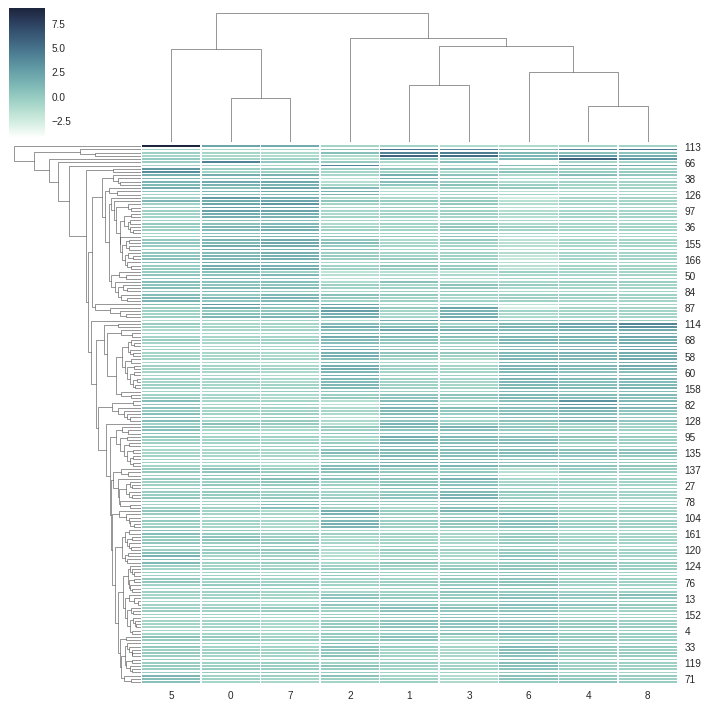

In [40]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(data_scaled, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Dendrogram Plotting using Ward's Method

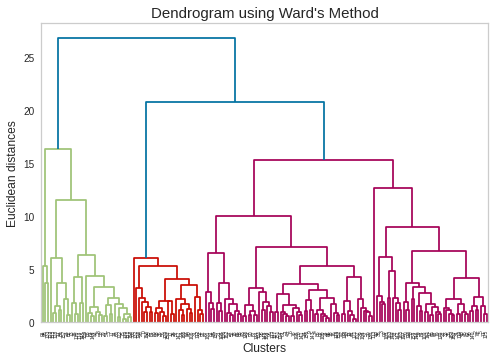

In [41]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

We can see 3 prominent clusters here (green, red, magenta). We will now follow the similar process of labelling data with cluster ids, then visualize the 3 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(data_scaled)

In [43]:
Y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [44]:
hcpreds = hc.labels_
data_hc_df = data_df.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country,Hier_Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan,2
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Albania,1
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Algeria,1
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Antigua and Barbuda,1
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Argentina,1
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Armenia,1
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Australia,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Austria,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Azerbaijan,1


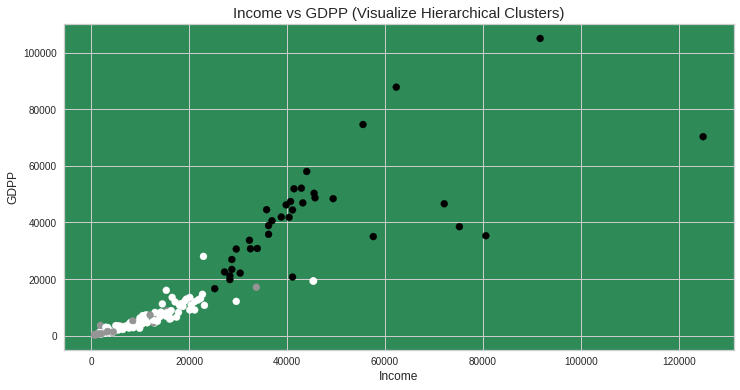

In [45]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_2
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.figure(figsize=(12,6))

#datahc_df = pd.DataFrame(data_hc_df)
plt_2.scatter(data_hc_df['income'],data_hc_df['gdpp'],c=cluster_labels) 
plt_2.title('Income vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Income", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.show()


The plot looks similar to what we had got earlier for the KMeans. Observing minutely both KMeans clustering's "Income vs GDPP" plot and hierarchical clustering's "Income vs GDPP" plot, we can detect the difference in assigning cluster labels for a few data points though.

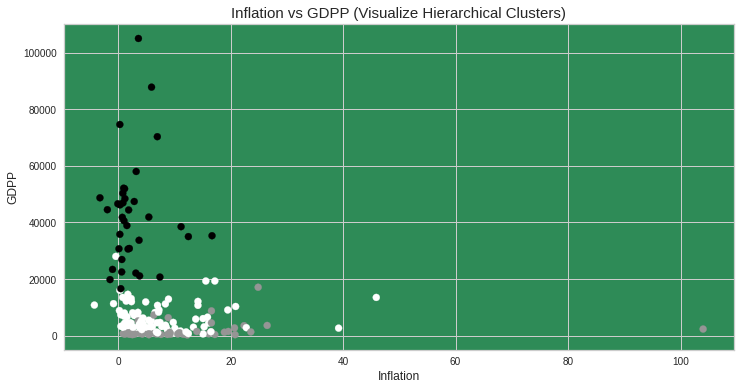

In [46]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
plt_2.figure(figsize=(12,6))
plt_2.scatter(data_hc_df['inflation'],data_hc_df['gdpp'],c=cluster_labels) 
plt_2.title('Inflation vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Inflation", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.show()

For this pair, the plot looks similar to what we had got earlier for the KMeans. Also, observing minutely both KMeans clustering's "Inflation vs GDPP" plot and hierarchical clustering's "Inflation vs GDPP" plot, we find almost no difference in assigning cluster labels for all data points.



In [47]:
data = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/Country-data.csv')

In [48]:
data.shape

(167, 10)

In [49]:
data_hc_df['Country'] = data['country']

In [50]:
data_hc_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country,Hier_Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Vanuatu,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Venezuela,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Vietnam,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Yemen,1


In [51]:
data_hc_df.Hier_Clusters.value_counts()

1    106
0     34
2     27
Name: Hier_Clusters, dtype: int64

In [52]:
cluster_0= data_hc_df.loc[data_hc_df['Hier_Clusters']==0]
cluster_0['Country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [53]:
cluster_1= data_hc_df.loc[data_hc_df['Hier_Clusters']==1]
cluster_1['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Congo, Rep.', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives',
       'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Nepal',
       'Nigeria', 'Pakis

In [54]:
cluster_2= data_hc_df.loc[data_hc_df['Hier_Clusters']==2]
cluster_2['Country'].unique()

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda',
       'Zambia'], dtype=object)

#**Conclusion**

* Cluster 2 contains the 3rd world or poor countries
* Cluster 1 contains the developing countries with average value of the parameters
* Cluster 0 contains the developed countries


#**Overall Conclusion**

* The third world countries clustered by K-means can be passed on to the CEO as the final list beacuse K-means is the most efficient and effective method of clustering among the both